In [58]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import kstest

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle

In [64]:
#Importar os dados
df = pd.read_csv('base_dummy.csv')
df_original = pd.read_csv('Base mesclada.csv')

colunas_escolhidas = ['BsmtFinType1','GarageFinish']
novas_colunas = ['Qualidade do acabamento do porão','Acabamento da Garagem']
df[novas_colunas] = df_original[colunas_escolhidas]

In [65]:
# Substituir o NaN pelo valor 'Nao possui'
def consertar(x):
    if str(x) == 'nan':
        return 'Nao possui'
    return x
    
df['Acabamento da Garagem'] = df[['Acabamento da Garagem']].applymap(consertar)
df['Qualidade do acabamento do porão'] = df[['Qualidade do acabamento do porão']].applymap(consertar)
df = df.drop(df[df['Zona'].isna()].index)
df = df.drop(df[df['Área da Garagem'].isna()].index)

# Verifico quais sao as variaveis nao categoricas
objects = ['object']
df_numerical = df.select_dtypes(exclude=objects)
colunas_para_Regressao_Logistica = df_numerical.columns

In [66]:
df.head()

,Preço da venda,Zona,Qualidade do Aquecimento,Número de Quartos,Área da Garagem,Área do Lote,Número de Banheiros,Idade do Imóvel,Alta Densidade Residencial,Baixa Densidade Residencial,Comercial,Média Densidade Residencial,Vila Flutuante Residencial,Bom,Excelente,Médio,Razoável,Ruim,Qualidade do acabamento do porão,Acabamento da Garagem
0,208500.000000,Baixa Densidade Residencial,Excelente,3,548.0,8450,2,5,0,1,0,0,0,0,1,0,0,0,GLQ,RFn
1,181500.000000,Baixa Densidade Residencial,Excelente,3,460.0,9600,2,31,0,1,0,0,0,0,1,0,0,0,ALQ,RFn
2,223500.000000,Baixa Densidade Residencial,Excelente,3,608.0,11250,2,7,0,1,0,0,0,0,1,0,0,0,GLQ,RFn
3,140000.000000,Baixa Densidade Residencial,Bom,3,642.0,9550,1,91,0,1,0,0,0,1,0,0,0,0,ALQ,Unf
4,250000.000000,Baixa Densidade Residencial,Excelente,4,836.0,14260,2,8,0,1,0,0,0,0,1,0,0,0,GLQ,RFn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,167081.220949,Média Densidade Residencial,Bom,3,0.0,1936,1,36,0,0,0,1,0,1,0,0,0,0,Unf,Nao possui
2915,164788.778231,Média Densidade Residencial,Médio,3,286.0,1894,1,36,0,0,0,1,0,0,0,1,0,0,Rec,Unf
2916,219222.423400,Baixa Densidade Residencial,Excelente,4,576.0,20000,1,46,0,1,0,0,0,0,1,0,0,0,ALQ,Unf
2917,184924.279659,Baixa Densidade Residencial,Médio,3,0.0,10441,1,14,0,1,0,0,0,0,0,1,0,0,GLQ,Nao possui


In [67]:
df = shuffle(df)
df.reset_index(drop=True)

,Preço da venda,Zona,Qualidade do Aquecimento,Número de Quartos,Área da Garagem,Área do Lote,Número de Banheiros,Idade do Imóvel,Alta Densidade Residencial,Baixa Densidade Residencial,Comercial,Média Densidade Residencial,Vila Flutuante Residencial,Bom,Excelente,Médio,Razoável,Ruim,Qualidade do acabamento do porão,Acabamento da Garagem
0,162447.639334,Baixa Densidade Residencial,Razoável,2,344.0,7801,1,57,0,1,0,0,0,0,0,0,1,0,Rec,Fin
1,163419.663729,Média Densidade Residencial,Excelente,3,0.0,1900,1,40,0,0,0,1,0,0,1,0,0,0,Unf,Nao possui
2,113000.000000,Média Densidade Residencial,Médio,2,280.0,6380,1,84,0,0,0,1,0,0,0,1,0,0,Unf,Unf
3,117000.000000,Média Densidade Residencial,Bom,2,255.0,5310,1,96,0,0,0,1,0,1,0,0,0,0,Unf,Unf
4,174519.904826,Baixa Densidade Residencial,Bom,3,528.0,7400,1,44,0,1,0,0,0,1,0,0,0,0,LwQ,Unf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2909,183783.139375,Baixa Densidade Residencial,Excelente,3,638.0,10984,2,1,0,1,0,0,0,0,1,0,0,0,Unf,RFn
2910,176901.093954,Baixa Densidade Residencial,Excelente,2,501.0,13110,2,34,0,1,0,0,0,0,1,0,0,0,GLQ,Fin
2911,100000.000000,Baixa Densidade Residencial,Médio,2,0.0,7446,1,65,0,1,0,0,0,0,0,1,0,0,Rec,Nao possui
2912,180358.114293,Baixa Densidade Residencial,Excelente,2,270.0,15428,1,55,0,1,0,0,0,0,1,0,0,0,Rec,Fin


# Verificar Pressupostos da Regressão Logística

- Valor esperado do erro = 0
- Inexistência de autocorrelação entre erros; e entre estes e as variáveis independentes
- Ausência de multicolinearidade perfeita entre as variáveis independentes

## Inexistência de autocorrelação entre erros; e entre estes e as variáveis independentes

## variável dependente: Qualidade do acabamento do porão

In [70]:
X = df_independentes.copy()
y = df['Qualidade do acabamento do porão'].copy()

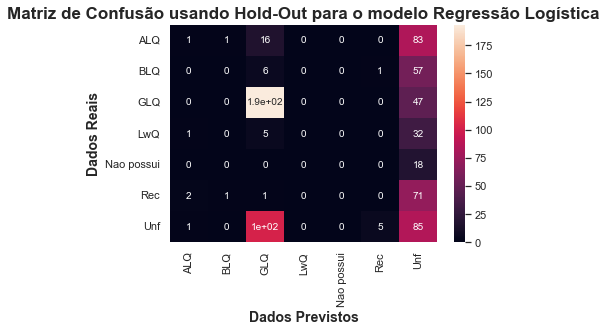

In [71]:
# Uso metodo holdout para separar conjunto de treinamento e conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Instancio o modelo regressao logistica
reg_log = LogisticRegression(random_state=0, max_iter=10000)

# Executo o algoritmo o treinamento do modelo
reg_log.fit(X_train, y_train)

y_pred = reg_log.predict(X_test)
arr = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(arr, columns=np.unique(y_test), index = np.unique(y_test))
ax = sns.heatmap(df_cm, annot=True)
# ax.set(xlabel='Dados Previstos', ylabel='Dados Reais',fontdict={'fontsize':14,'fontweight':'bold'})
plt.xlabel("Dados Previstos",fontdict = {'fontsize':14,'fontweight':'bold'})
plt.ylabel("Dados Reais",fontdict = {'fontsize':14,'fontweight':'bold'})
sns.set(rc={'figure.figsize':(20,15)})
plt.title("Matriz de Confusão usando Hold-Out para o modelo Regressão Logística",fontdict = {'fontsize':17,'fontweight':'bold'})
plt.show()

In [72]:
# Separo em 10 folds
scores = cross_val_score(reg_log, X_train, y_train, cv=10)
print('Acuracidade Média do Cross Validation (10 folds):', scores.mean())

Acuracidade Média do Cross Validation (10 folds): 0.39405135939005487


## variável dependente: Acabamento da Garagem

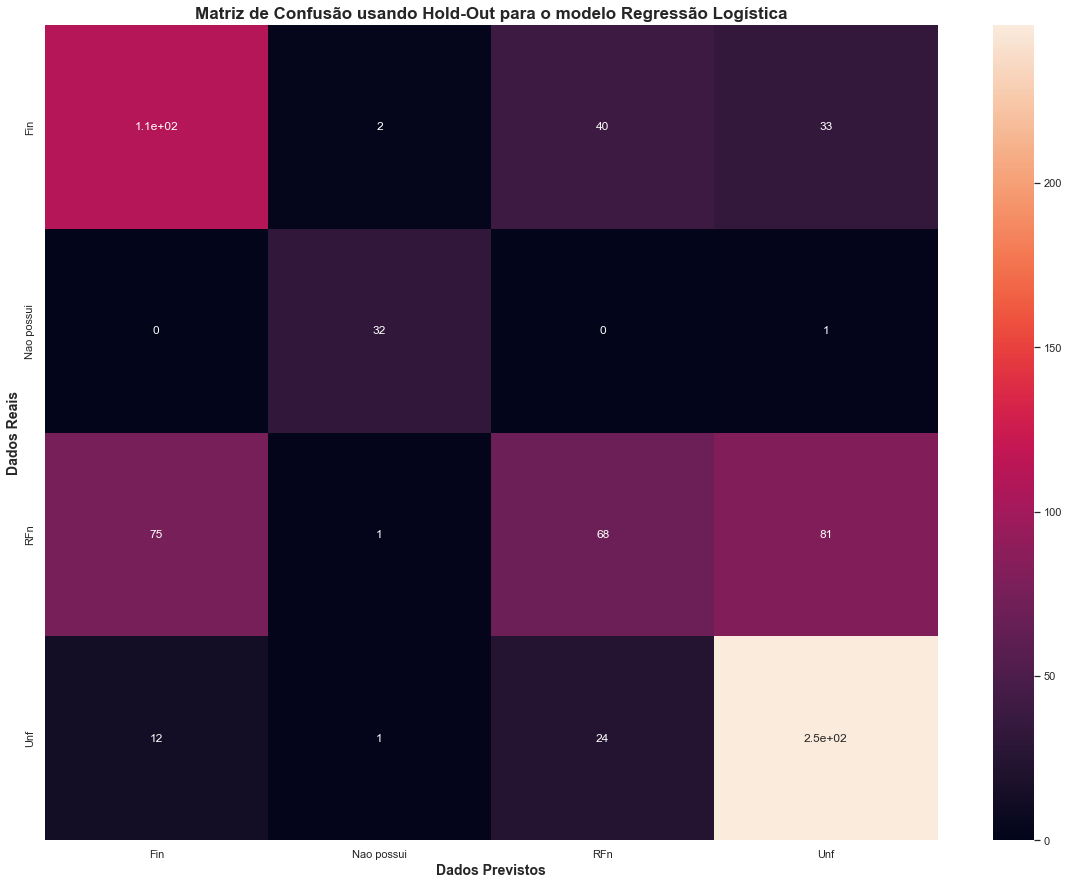

In [73]:
X = df_independentes.copy()
y = df['Acabamento da Garagem'].copy()

# Uso metodo holdout para separar conjunto de treinamento e conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Instancio o modelo regressao logistica
reg_log = LogisticRegression(random_state=0, max_iter=10000)

# Executo o algoritmo o treinamento do modelo
reg_log.fit(X_train, y_train)

y_pred = reg_log.predict(X_test)
arr = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(arr, columns=np.unique(y_test), index = np.unique(y_test))
ax = sns.heatmap(df_cm, annot=True)
# ax.set(xlabel='Dados Previstos', ylabel='Dados Reais',fontdict={'fontsize':14,'fontweight':'bold'})
plt.xlabel("Dados Previstos",fontdict = {'fontsize':14,'fontweight':'bold'})
plt.ylabel("Dados Reais",fontdict = {'fontsize':14,'fontweight':'bold'})
sns.set(rc={'figure.figsize':(20,15)})
plt.title("Matriz de Confusão usando Hold-Out para o modelo Regressão Logística",fontdict = {'fontsize':17,'fontweight':'bold'})
plt.show()

In [74]:
# Separo em 10 folds
scores = cross_val_score(reg_log, X_train, y_train, cv=10)
print('Acuracidade Média do Cross Validation (10 folds):', scores.mean())

Acuracidade Média do Cross Validation (10 folds): 0.6296971220309161


In [91]:
y_prob = reg_log.predict_proba(X_test)
y_hat = reg_log.predict(X_test)

In [109]:
df_prob = pd.DataFrame(y_prob)
df_prob[4] = pd.DataFrame(y_hat)
df_prob

,0,1,2,3,4
0,0.499634,2.254664e-13,0.413054,0.087313,Fin
1,0.028332,1.224190e-15,0.054514,0.917154,Unf
2,0.163518,2.858199e-15,0.217860,0.618622,Unf
3,0.207517,5.301153e-09,0.257877,0.534606,Unf
4,0.177395,9.358053e-09,0.231142,0.591463,Unf
...,...,...,...,...,...
724,0.459913,1.490969e-13,0.417249,0.122838,Fin
725,0.132185,1.644275e-10,0.191537,0.676278,Unf
726,0.477016,3.841901e-28,0.471214,0.051770,Fin
727,0.000009,9.999482e-01,0.000008,0.000034,Nao possui


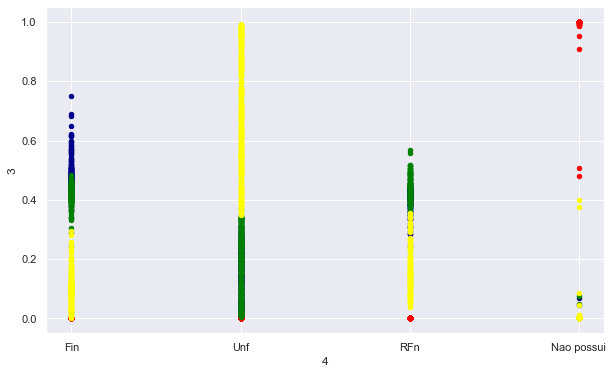

In [118]:
ax = df_prob.plot(kind='scatter', x=4, y=0, figsize=(10, 6), color='darkblue')
ax1 = df_prob.plot(kind='scatter', x=4, y=1, figsize=(10, 6), color='red', ax=ax)
ax2 = df_prob.plot(kind='scatter', x=4, y=2, figsize=(10, 6), color='green', ax=ax1)
ax3 = df_prob.plot(kind='scatter', x=4, y=3, figsize=(10, 6), color='yellow', ax=ax2)